In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd 

In [1]:
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.layers import LSTM  
from keras.models import Sequential  

# PM25

2021-11-22 08:44:20.716267: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 08:44:22.357106: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
50/50 [==============================] - 29s 16ms/step - loss: 0.0385
Epoch 2/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0092
Epoch 3/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0087
Epoch 4/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0077
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0073
Epoch 6/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0079
Epoch 7/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0067
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0060
Epoch 9/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0062
Epoch 10/100
50/50 [==============================] - 1s 20ms/step - loss: 0.0057
Epoch 11/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 12/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0062
Epoch 13/100
50/50 [====

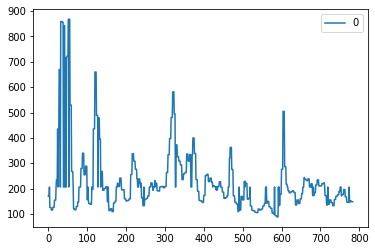

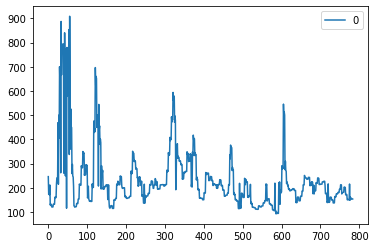

In [2]:
xts_Jan21PM25_Stationary_DF = pd.read_csv('Data_Processing_and_ARIMA/Train/xts_Jan21PM25_Stationary_DF.csv')
#xts_Jan21PM25_Stationary_DF.head(10)

xts_Jan21PM25_Stationary_DF_data = xts_Jan21PM25_Stationary_DF.iloc[4:, [4]]
#xts_Jan21PM25_Stationary_DF_data.head()

xts_Jan21PM25_Stationary_DF_data = xts_Jan21PM25_Stationary_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

xts_Jan21PM25_Stationary_DF_data_np = xts_Jan21PM25_Stationary_DF_data.to_numpy()
xts_Jan21PM25_Stationary_DF_data_reshape = np.reshape(xts_Jan21PM25_Stationary_DF_data_np, (len(xts_Jan21PM25_Stationary_DF_data_np), -1))

from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
xts_Jan21PM25_data_scaled = sc.fit_transform(xts_Jan21PM25_Stationary_DF_data_reshape)  

xts_Jan21PM25_data_scaled = xts_Jan21PM25_data_scaled.flatten()
xts_Jan21PM25_data_scaled = pd.DataFrame(xts_Jan21PM25_data_scaled)

X_train, y_train = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(xts_Jan21PM25_Stationary_DF_data_np)):
    a = xts_Jan21PM25_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_train = pd.concat([X_train, a])
    y_train = y_train.append(xts_Jan21PM25_data_scaled[i:i+1])  



x_train = X_train.to_numpy()
#X_train.shape
TrainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  
#TrainX

############################################



xts_Jan21PM25_data_mean = xts_Jan21PM25_Stationary_DF_data.mean()
xts_Jan21PM25_data_mean = xts_Jan21PM25_data_mean.to_numpy()
xts_Jan21PM25_data_mean = xts_Jan21PM25_data_mean[0]
xts_Jan21PM25_data_mean


##########################################
 

##########################################
LSTM_Model = Sequential()  
LSTM_Model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 50))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(Dense(units = 1))  
LSTM_Model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
LSTM_Model.fit(TrainX, y_train, epochs = 125, batch_size = 32) 


##########################################

ValidationJan21PM25_DF = pd.read_csv('Data_Processing_and_ARIMA/TestTrainValid/ValidationJan21PM25.csv')
#ValidationJan21PM25_DF.head(10)

ValidationJan21PM25_DF_data = ValidationJan21PM25_DF.iloc[4:, [4]]
#ValidationJan21PM25_DF_data.head()

ValidationJan21PM25_DF_data = ValidationJan21PM25_DF_data.mask(ValidationJan21PM25_DF_data == "None", xts_Jan21PM25_data_mean)
#ValidationJan21PM25_DF_data.head()



ValidationJan21PM25_DF_data = ValidationJan21PM25_DF_data.fillna(0)
ValidationJan21PM25_DF_data = ValidationJan21PM25_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

#ValidationJan21PM25_DF_data.head()

ValidationJan21PM25_DF_data_np = ValidationJan21PM25_DF_data.to_numpy()
ValidationJan21PM25_DF_data_reshape = np.reshape(ValidationJan21PM25_DF_data_np, (len(ValidationJan21PM25_DF_data_np), -1))





from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
ValidationJan21PM25_DF_data_scaled = sc.fit_transform(ValidationJan21PM25_DF_data_reshape)  

ValidationJan21PM25_DF_data_scaled = ValidationJan21PM25_DF_data_scaled.flatten()
ValidationJan21PM25_DF_data_scaled = pd.DataFrame(ValidationJan21PM25_DF_data_scaled)

X_test, y_test = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(ValidationJan21PM25_DF_data_np)):
    a = ValidationJan21PM25_DF_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_test = pd.concat([X_test, a])
    y_test = y_test.append(ValidationJan21PM25_DF_data_scaled[i:i+1]) 
    
    
    

x_test = X_test.to_numpy()
#X_test.shape
TestX = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  
#TestX

predicted_values = LSTM_Model.predict(TestX)  

#predicted_values

flattened_pred_val = predicted_values.flatten().reshape((-1,1))
flattened_pred_val = sc.inverse_transform(flattened_pred_val)
Predicted_ValPM25 = pd.DataFrame(flattened_pred_val)
#Predicted_Val

y_test = sc.inverse_transform(y_test)
TestyPM25 = pd.DataFrame(y_test)

#Testy

##########################################

axes = TestyPM25.plot()
axes = Predicted_ValPM25.plot()

# NO

In [ ]:
xts_Jan21NO_Stationary_DF = pd.read_csv('Data_Processing_and_ARIMA/Train/xts_Jan21NO_Stationary_DF.csv')
#xts_Jan21NO_Stationary_DF.head(10)

xts_Jan21NO_Stationary_DF_data = xts_Jan21NO_Stationary_DF.iloc[4:, [4]]
#xts_Jan21NO_Stationary_DF_data.head()

xts_Jan21NO_Stationary_DF_data = xts_Jan21NO_Stationary_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

xts_Jan21NO_Stationary_DF_data_np = xts_Jan21NO_Stationary_DF_data.to_numpy()
xts_Jan21NO_Stationary_DF_data_reshape = np.reshape(xts_Jan21NO_Stationary_DF_data_np, (len(xts_Jan21NO_Stationary_DF_data_np), -1))

from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
xts_Jan21NO_data_scaled = sc.fit_transform(xts_Jan21NO_Stationary_DF_data_reshape)  

xts_Jan21NO_data_scaled = xts_Jan21NO_data_scaled.flatten()
xts_Jan21NO_data_scaled = pd.DataFrame(xts_Jan21NO_data_scaled)

X_train, y_train = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(xts_Jan21NO_Stationary_DF_data_np)):
    a = xts_Jan21NO_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_train = pd.concat([X_train, a])
    y_train = y_train.append(xts_Jan21NO_data_scaled[i:i+1])  



x_train = X_train.to_numpy()
#X_train.shape
TrainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  
#TrainX

############################################



xts_Jan21NO_data_mean = xts_Jan21NO_Stationary_DF_data.mean()
xts_Jan21NO_data_mean = xts_Jan21NO_data_mean.to_numpy()
xts_Jan21NO_data_mean = xts_Jan21NO_data_mean[0]
xts_Jan21NO_data_mean


##########################################


##########################################
LSTM_Model = Sequential()  
LSTM_Model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 50))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(Dense(units = 1))  
LSTM_Model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
LSTM_Model.fit(TrainX, y_train, epochs = 125, batch_size = 32) 


##########################################

ValidationJan21NO_DF = pd.read_csv('Data_Processing_and_ARIMA/TestTrainValid/ValidationJan21NO.csv')
#ValidationJan21NO_DF.head(10)

ValidationJan21NO_DF_data = ValidationJan21NO_DF.iloc[4:, [4]]
#ValidationJan21NO_DF_data.head()

ValidationJan21NO_DF_data = ValidationJan21NO_DF_data.mask(ValidationJan21NO_DF_data == "None", xts_Jan21NO_data_mean)
#ValidationJan21NO_DF_data.head()



ValidationJan21NO_DF_data = ValidationJan21NO_DF_data.fillna(0)
ValidationJan21NO_DF_data = ValidationJan21NO_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

#ValidationJan21NO_DF_data.head()

ValidationJan21NO_DF_data_np = ValidationJan21NO_DF_data.to_numpy()
ValidationJan21NO_DF_data_reshape = np.reshape(ValidationJan21NO_DF_data_np, (len(ValidationJan21NO_DF_data_np), -1))





from sklearn.preprocessing import MinMaxScaler  
sc1 = MinMaxScaler(feature_range=(0, 1))  
ValidationJan21NO_DF_data_scaled = sc1.fit_transform(ValidationJan21NO_DF_data_reshape)  

ValidationJan21NO_DF_data_scaled = ValidationJan21NO_DF_data_scaled.flatten()
ValidationJan21NO_DF_data_scaled = pd.DataFrame(ValidationJan21NO_DF_data_scaled)

X_test, y_test = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(ValidationJan21NO_DF_data_np)):
    a = ValidationJan21NO_DF_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_test = pd.concat([X_test, a])
    y_test = y_test.append(ValidationJan21NO_DF_data_scaled[i:i+1]) 
    
    
    

x_test = X_test.to_numpy()
#X_test.shape
TestX = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  
#TestX

predicted_values = LSTM_Model.predict(TestX)  

#predicted_values

flattened_pred_val = predicted_values.flatten().reshape((-1,1))
flattened_pred_val = sc1.inverse_transform(flattened_pred_val)
Predicted_ValNO = pd.DataFrame(flattened_pred_val)
#Predicted_Val

y_test = sc1.inverse_transform(y_test)
TestyNO = pd.DataFrame(y_test)

#Testy

##########################################

axes = TestyNO.plot()
axes = Predicted_ValNO.plot()

2021-11-22 10:40:46.477701: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-22 10:40:48.527787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
50/50 [==============================] - 28s 16ms/step - loss: 0.0195
Epoch 2/100
50/50 [==============================] - 1s 16ms/step - loss: 0.0075
Epoch 3/100
50/50 [==============================] - 1s 26ms/step - loss: 0.0084
Epoch 4/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0073
Epoch 5/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0083
Epoch 6/100
50/50 [==============================] - 1s 16ms/step - loss: 0.0103
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0058
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0087
Epoch 9/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0067
Epoch 10/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0049
Epoch 11/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0040
Epoch 12/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0057
Epoch 13/100
50/50 [====

# NOx

Epoch 1/100
50/50 [==============================] - 8s 14ms/step - loss: 0.0354
Epoch 2/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0104
Epoch 3/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0080
Epoch 4/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0080
Epoch 5/100
50/50 [==============================] - 1s 13ms/step - loss: 0.0072
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0085
Epoch 7/100
50/50 [==============================] - 1s 17ms/step - loss: 0.0079
Epoch 8/100
50/50 [==============================] - 1s 14ms/step - loss: 0.0069
Epoch 9/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0070
Epoch 10/100
50/50 [==============================] - 1s 17ms/step - loss: 0.0060
Epoch 11/100
50/50 [==============================] - 1s 17ms/step - loss: 0.0061
Epoch 12/100
50/50 [==============================] - 1s 18ms/step - loss: 0.0060
Epoch 13/100
50/50 [=====

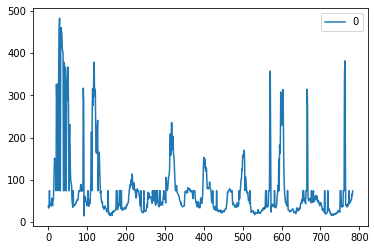

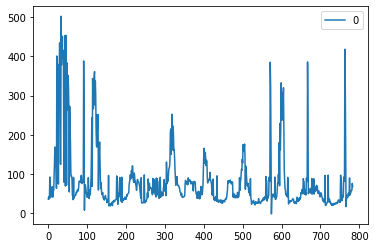

In [5]:
xts_Jan21NOx_Stationary_DF = pd.read_csv('Data_Processing_and_ARIMA/Train/xts_Jan21NOx_Stationary_DF.csv')
#xts_Jan21NOx_Stationary_DF.head(10)

xts_Jan21NOx_Stationary_DF_data = xts_Jan21NOx_Stationary_DF.iloc[4:, [4]]
#xts_Jan21NOx_Stationary_DF_data.head()

xts_Jan21NOx_Stationary_DF_data = xts_Jan21NOx_Stationary_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

xts_Jan21NOx_Stationary_DF_data_np = xts_Jan21NOx_Stationary_DF_data.to_numpy()
xts_Jan21NOx_Stationary_DF_data_reshape = np.reshape(xts_Jan21NOx_Stationary_DF_data_np, (len(xts_Jan21NOx_Stationary_DF_data_np), -1))

from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
xts_Jan21NOx_data_scaled = sc.fit_transform(xts_Jan21NOx_Stationary_DF_data_reshape)  

xts_Jan21NOx_data_scaled = xts_Jan21NOx_data_scaled.flatten()
xts_Jan21NOx_data_scaled = pd.DataFrame(xts_Jan21NOx_data_scaled)

X_train, y_train = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(xts_Jan21NOx_Stationary_DF_data_np)):
    a = xts_Jan21NOx_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_train = pd.concat([X_train, a])
    y_train = y_train.append(xts_Jan21NOx_data_scaled[i:i+1])  



x_train = X_train.to_numpy()
#X_train.shape
TrainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  
#TrainX

############################################



xts_Jan21NOx_data_mean = xts_Jan21NOx_Stationary_DF_data.mean()
xts_Jan21NOx_data_mean = xts_Jan21NOx_data_mean.to_numpy()
xts_Jan21NOx_data_mean = xts_Jan21NOx_data_mean[0]
xts_Jan21NOx_data_mean


##########################################

  
  
  
  

##########################################
LSTM_Model = Sequential()  
LSTM_Model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 50))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(Dense(units = 1))  
LSTM_Model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
LSTM_Model.fit(TrainX, y_train, epochs = 125, batch_size = 32) 


##########################################

ValidationJan21NOx_DF = pd.read_csv('Data_Processing_and_ARIMA/TestTrainValid/ValidationJan21NOx.csv')
#ValidationJan21NOx_DF.head(10)

ValidationJan21NOx_DF_data = ValidationJan21NOx_DF.iloc[4:, [4]]
#ValidationJan21NOx_DF_data.head()

ValidationJan21NOx_DF_data = ValidationJan21NOx_DF_data.mask(ValidationJan21NOx_DF_data == "None", xts_Jan21NOx_data_mean)
#ValidationJan21NOx_DF_data.head()



ValidationJan21NOx_DF_data = ValidationJan21NOx_DF_data.fillna(0)
ValidationJan21NOx_DF_data = ValidationJan21NOx_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

#ValidationJan21NOx_DF_data.head()

ValidationJan21NOx_DF_data_np = ValidationJan21NOx_DF_data.to_numpy()
ValidationJan21NOx_DF_data_reshape = np.reshape(ValidationJan21NOx_DF_data_np, (len(ValidationJan21NOx_DF_data_np), -1))





from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
ValidationJan21NOx_DF_data_scaled = sc.fit_transform(ValidationJan21NOx_DF_data_reshape)  

ValidationJan21NOx_DF_data_scaled = ValidationJan21NOx_DF_data_scaled.flatten()
ValidationJan21NOx_DF_data_scaled = pd.DataFrame(ValidationJan21NOx_DF_data_scaled)

X_test, y_test = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(ValidationJan21NOx_DF_data_np)):
    a = ValidationJan21NOx_DF_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_test = pd.concat([X_test, a])
    y_test = y_test.append(ValidationJan21NOx_DF_data_scaled[i:i+1]) 
    
    
    

x_test = X_test.to_numpy()
#X_test.shape
TestX = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  
#TestX

predicted_values = LSTM_Model.predict(TestX)  

#predicted_values

flattened_pred_val = predicted_values.flatten().reshape((-1,1))
flattened_pred_val = sc.inverse_transform(flattened_pred_val)
Predicted_ValNOx = pd.DataFrame(flattened_pred_val)
#Predicted_Val

y_test = sc.inverse_transform(y_test)
TestyNOx = pd.DataFrame(y_test)

#Testy

##########################################

axes = TestyNOx.plot()
axes = Predicted_ValNOx.plot()

# SO2

Epoch 1/100
50/50 [==============================] - 16s 39ms/step - loss: 0.0136
Epoch 2/100
50/50 [==============================] - 1s 16ms/step - loss: 0.0043
Epoch 3/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 4/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 5/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0038
Epoch 6/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0046
Epoch 7/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0059
Epoch 8/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0048
Epoch 9/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0042
Epoch 10/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0038
Epoch 11/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0038
Epoch 12/100
50/50 [==============================] - 1s 15ms/step - loss: 0.0029
Epoch 13/100
50/50 [====

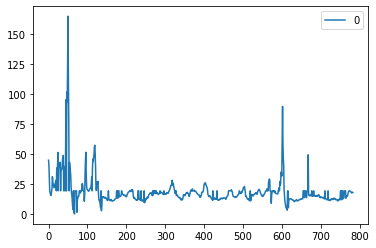

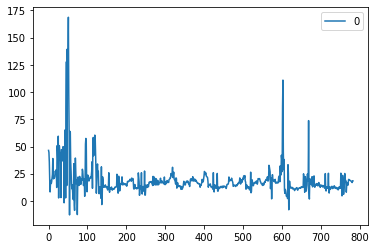

In [6]:
xts_Jan21SO2_Stationary_DF = pd.read_csv('Data_Processing_and_ARIMA/Train/xts_Jan21SO2_Stationary_DF.csv')
#xts_Jan21SO2_Stationary_DF.head(10)

xts_Jan21SO2_Stationary_DF_data = xts_Jan21SO2_Stationary_DF.iloc[4:, [4]]
#xts_Jan21SO2_Stationary_DF_data.head()

xts_Jan21SO2_Stationary_DF_data = xts_Jan21SO2_Stationary_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

xts_Jan21SO2_Stationary_DF_data_np = xts_Jan21SO2_Stationary_DF_data.to_numpy()
xts_Jan21SO2_Stationary_DF_data_reshape = np.reshape(xts_Jan21SO2_Stationary_DF_data_np, (len(xts_Jan21SO2_Stationary_DF_data_np), -1))

from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
xts_Jan21SO2_data_scaled = sc.fit_transform(xts_Jan21SO2_Stationary_DF_data_reshape)  

xts_Jan21SO2_data_scaled = xts_Jan21SO2_data_scaled.flatten()
xts_Jan21SO2_data_scaled = pd.DataFrame(xts_Jan21SO2_data_scaled)

X_train, y_train = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(xts_Jan21SO2_Stationary_DF_data_np)):
    a = xts_Jan21SO2_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_train = pd.concat([X_train, a])
    y_train = y_train.append(xts_Jan21SO2_data_scaled[i:i+1])  



x_train = X_train.to_numpy()
#X_train.shape
TrainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))  
#TrainX

############################################



xts_Jan21SO2_data_mean = xts_Jan21SO2_Stationary_DF_data.mean()
xts_Jan21SO2_data_mean = xts_Jan21SO2_data_mean.to_numpy()
xts_Jan21SO2_data_mean = xts_Jan21SO2_data_mean[0]
xts_Jan21SO2_data_mean


##########################################

  
  
  
  

##########################################
LSTM_Model = Sequential()  
LSTM_Model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 60, return_sequences = True))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(LSTM(units = 50))  
LSTM_Model.add(Dropout(0.345))  
LSTM_Model.add(Dense(units = 1))  
LSTM_Model.compile(optimizer = 'adam', loss = 'mean_squared_error') 
LSTM_Model.fit(TrainX, y_train, epochs = 125, batch_size = 32) 


##########################################

ValidationJan21SO2_DF = pd.read_csv('Data_Processing_and_ARIMA/TestTrainValid/ValidationJan21SO2.csv')
#ValidationJan21SO2_DF.head(10)

ValidationJan21SO2_DF_data = ValidationJan21SO2_DF.iloc[4:, [4]]
#ValidationJan21SO2_DF_data.head()

ValidationJan21SO2_DF_data = ValidationJan21SO2_DF_data.mask(ValidationJan21SO2_DF_data == "None", xts_Jan21SO2_data_mean)
#ValidationJan21SO2_DF_data.head()



ValidationJan21SO2_DF_data = ValidationJan21SO2_DF_data.fillna(0)
ValidationJan21SO2_DF_data = ValidationJan21SO2_DF_data.apply(pd.to_numeric) # convert all columns of DataFrame

#ValidationJan21SO2_DF_data.head()

ValidationJan21SO2_DF_data_np = ValidationJan21SO2_DF_data.to_numpy()
ValidationJan21SO2_DF_data_reshape = np.reshape(ValidationJan21SO2_DF_data_np, (len(ValidationJan21SO2_DF_data_np), -1))





from sklearn.preprocessing import MinMaxScaler  
sc = MinMaxScaler(feature_range=(0, 1))  
ValidationJan21SO2_DF_data_scaled = sc.fit_transform(ValidationJan21SO2_DF_data_reshape)  

ValidationJan21SO2_DF_data_scaled = ValidationJan21SO2_DF_data_scaled.flatten()
ValidationJan21SO2_DF_data_scaled = pd.DataFrame(ValidationJan21SO2_DF_data_scaled)

X_test, y_test = pd.DataFrame(), pd.DataFrame()
for i in range(5, len(ValidationJan21SO2_DF_data_np)):
    a = ValidationJan21SO2_DF_data_scaled[i-5:i].transpose()
    a = a.rename(columns={i-5:0,i-4:1,i-3:2,i-2:3,i-1:4}, index={0:i})
    X_test = pd.concat([X_test, a])
    y_test = y_test.append(ValidationJan21SO2_DF_data_scaled[i:i+1]) 
    
    
    

x_test = X_test.to_numpy()
#X_test.shape
TestX = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  
#TestX

predicted_values = LSTM_Model.predict(TestX)  

#predicted_values

flattened_pred_val = predicted_values.flatten().reshape((-1,1))
flattened_pred_val = sc.inverse_transform(flattened_pred_val)
Predicted_ValSO2 = pd.DataFrame(flattened_pred_val)
#Predicted_Val

y_test = sc.inverse_transform(y_test)
TestySO2 = pd.DataFrame(y_test)

#Testy

##########################################

axes = TestySO2.plot()
axes = Predicted_ValSO2.plot()

In [7]:
#from sklearn.metrics import explained_variance_score
#explained_variance_score(Testy, Predicted_Val)

In [8]:
TestyPM25.to_csv('ForecastLSTM/TestyPM25.csv')  
Predicted_ValPM25.to_csv('ForecastLSTM/Predicted_ValPM25.csv')  

In [9]:
TestyNO.to_csv('ForecastLSTM/TestyNO.csv')  
Predicted_ValNO.to_csv('ForecastLSTM/Predicted_ValNO.csv')  

In [11]:
TestyNOx.to_csv('ForecastLSTM/TestyNOx.csv')  
Predicted_ValNOx.to_csv('ForecastLSTM/Predicted_ValNOx.csv')  

In [12]:
TestySO2.to_csv('ForecastLSTM/TestySO2.csv')  
Predicted_ValSO2.to_csv('ForecastLSTM/Predicted_ValSO2.csv')  